#  PATEL SMITKUMAR KAUSHIKKUMAR (CIN 306587208)

#  CS 4661: Introduction to Data Science     

#   Homework_4 

## Question2: predict the probability of Heart Disease

### a- In this question, we work with a simplified version of Heart dataset (remember that this dataset is a little different from what you have used in HW3). Read the dataset file “Hearts_short.csv” (you should download it from CSNS), and assign it to a Pandas DataFrame.

In [1]:
# required libarary
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
heart_df = pd.read_csv("S:\MASTERS\SEMESTER_4\CS_4661\HomeWork\Homework_4/Heart_short.csv")
heart_df[0::10]

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
10,57,140,192,0,148,0.4,No
20,64,110,211,2,144,1.8,No
30,69,140,239,0,151,1.8,No
40,40,140,199,0,178,1.4,No
50,51,125,213,2,125,1.4,No
60,39,140,321,2,182,0.0,No
70,62,130,231,0,146,1.8,No
80,57,128,303,2,159,0.0,No
90,52,118,186,2,190,0.0,No


### b- Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [3]:
def categorical_to_numeric(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0   
    
heart_df['label'] = heart_df['AHD'].apply(categorical_to_numeric)
y= heart_df['label']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [4]:
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']
X = heart_df[feature_cols]
X.head()


,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [5]:
# Normalization of feature matrix
X_scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_scaled


array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

### c- Split the dataset into testing and training sets with the following parameters: 
### test_size=0.25, random_state=3

In [6]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=3)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(210, 6)
(210,)
(71, 6)
(71,)


### d- Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [7]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)

0.7183098591549296


### Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [8]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
print(fpr)
print(tpr)

[0.         0.02439024 0.02439024 0.04878049 0.04878049 0.09756098
 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146 0.2195122
 0.2195122  0.29268293 0.29268293 0.3902439  0.3902439  0.41463415
 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561 0.68292683
 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732 1.        ]
[0.03333333 0.03333333 0.33333333 0.33333333 0.36666667 0.36666667
 0.4        0.4        0.53333333 0.53333333 0.6        0.6
 0.63333333 0.63333333 0.7        0.7        0.73333333 0.73333333
 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667 0.86666667
 0.93333333 0.93333333 0.96666667 0.96666667 1.         1.        ]


In [9]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


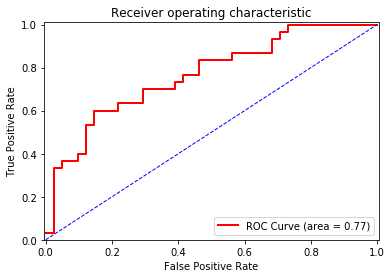

In [10]:
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()